In [30]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
dtype = torch.float32

In [3]:
cost = lambda x: torch.linalg.norm(x, axis=-1) ** 2

In [84]:
n1 = 5
Q1 = np.array([
    [8, 2, 3, 4, 5],
    [2, 7, 2, 3, 4],
    [3, 2, 6, 2, 3],
    [4, 3, 2, 5, 2],
    [5, 4, 3, 2, 9]
])
weights1 = np.array([2, 3, 4, 5, 9])
capacity1 = 10

Q = torch.tensor(Q1, dtype=dtype)
weights = torch.tensor(weights1, dtype=dtype)
capacity = capacity1
dim = n1

weights_torch = weights / capacity

In [85]:
potential = lambda x: -torch.einsum('ni,ij,nj->n', x, Q, x)
isvalid = lambda x: (x @ weights_torch <= 1)

def cost(x, w):
    vals = potential(x) - (torch.log(x) + torch.log(1 - x)).sum(axis=-1) - torch.log(1 - x @ weights_torch)
    return vals

In [90]:
w = 200

In [95]:
particles = torch.rand(10, dim, requires_grad=True, dtype=dtype) * 0.1

In [96]:
h = 1
lr = 0.1

In [99]:
particles

tensor([[0.0407, 0.0559, 0.0347, 0.0914, 0.0326],
        [0.0622, 0.0448, 0.0166, 0.0009, 0.0307],
        [0.0002, 0.0551, 0.0315, 0.0774, 0.0355],
        [0.0407, 0.0661, 0.0229, 0.0195, 0.0166],
        [0.0067, 0.0581, 0.0268, 0.0439, 0.0866],
        [0.0845, 0.0443, 0.0943, 0.0920, 0.0811],
        [0.0203, 0.0130, 0.0747, 0.0437, 0.0743],
        [0.0527, 0.0527, 0.0597, 0.0497, 0.0125],
        [0.0171, 0.0826, 0.0708, 0.0612, 0.0716],
        [0.0377, 0.0092, 0.0082, 0.0212, 0.0986]], grad_fn=<MulBackward0>)

In [97]:
for i in range(1000):
    val = cost(particles, w).sum()
    val.backward()

    grad = -particles.grad

    with torch.no_grad():
        K = torch.exp(-(1 / h) * torch.linalg.norm(particles[:, :, None] - particles.T[None, :, :], axis=1) ** 2)
        grad_K = (2 / h) * ((particles[:, :, None] - particles.T[None, :, :]) * K[:, None, :]).sum(axis=-1)

        phi = (K @ grad + grad_K) / len(particles)

        particles += lr * phi

    particles.grad.zero_();

/var/folders/99/5f_qszrn5y132sfcdd12k2f80000gn/T/ipykernel_16263/265171241.py:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  grad = -particles.grad


TypeError: bad operand type for unary -: 'NoneType'

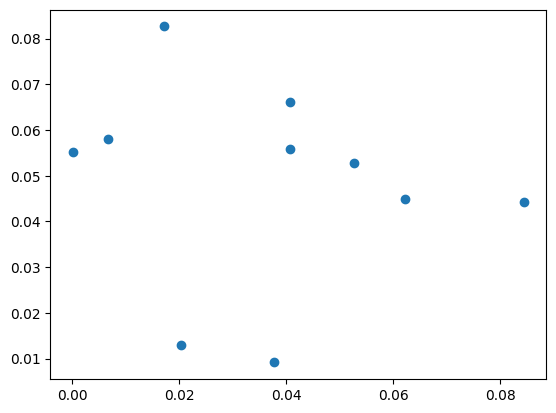

In [100]:
temp_particles = particles.detach().numpy()
plt.scatter(temp_particles[:, 0], temp_particles[:, 1])